<a href="https://colab.research.google.com/github/JusiaJusia/Traffic-Sign-Recognition/blob/master/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import datetime 

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/m_3/data'

/content/drive/My Drive/Colab Notebooks/matrix/m_3/data


In [0]:
train = pd.read_pickle('train.p')
test = pd.read_pickle('test.p')

X_train, y_train = train['features'],train['labels']
X_test, y_test = test['features'],test['labels']


In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation='relu', input_shape = input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
])
  
def train_model(model, X_train,y_train, params_fit={}): 
  model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('"%m/%d/%Y-%H:%M:%S"'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train,y_train)),
      callbacks = [tensorboard_callback]
      )
  return model

In [8]:
model=get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 38.9294 - accuracy: 0.7582 - val_loss: 0.2462 - val_accuracy: 0.9403
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1898 - accuracy: 0.9556 - val_loss: 0.0990 - val_accuracy: 0.9761
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1341 - accuracy: 0.9695 - val_loss: 0.1917 - val_accuracy: 0.9591
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1452 - accuracy: 0.9677 - val_loss: 0.0705 - val_accuracy: 0.9832
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0827 - accuracy: 0.9809 - val_loss: 0.0612 - val_accuracy: 0.9851


In [0]:
df= pd.read_csv('signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score ):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_probability=model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_probability, axis=1)

  return scoring(y_test_norm, y_pred)



In [11]:
predict(model,X_test, y_test)

0.8222222222222222

Architecture engineering 

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)

  return predict(model,X_test, y_test)

In [17]:
def get_cnn_v2(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])



train_and_predict(get_cnn_v2(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 5.4311 - accuracy: 0.2800 - val_loss: 1.2985 - val_accuracy: 0.6561
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 1.2276 - accuracy: 0.6466 - val_loss: 0.4159 - val_accuracy: 0.8995
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.6245 - accuracy: 0.8195 - val_loss: 0.1917 - val_accuracy: 0.9551
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.4030 - accuracy: 0.8809 - val_loss: 0.1329 - val_accuracy: 0.9684
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3018 - accuracy: 0.9106 - val_loss: 0.0710 - val_accuracy: 0.9843


0.9213151927437642

In [18]:
def get_cnn_v3(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),

    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])



train_and_predict(get_cnn_v3(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 10s 37ms/step - loss: 2.7220 - accuracy: 0.4543 - val_loss: 0.6135 - val_accuracy: 0.8475
Epoch 2/5
272/272 [==============================] - 10s 36ms/step - loss: 0.6989 - accuracy: 0.7888 - val_loss: 0.1569 - val_accuracy: 0.9648
Epoch 3/5
272/272 [==============================] - 10s 36ms/step - loss: 0.3348 - accuracy: 0.9004 - val_loss: 0.0785 - val_accuracy: 0.9824
Epoch 4/5
272/272 [==============================] - 10s 36ms/step - loss: 0.2112 - accuracy: 0.9384 - val_loss: 0.0423 - val_accuracy: 0.9897
Epoch 5/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1509 - accuracy: 0.9558 - val_loss: 0.0271 - val_accuracy: 0.9943


0.9736961451247166

In [21]:
def get_cnn_v4(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding = 'same'),

    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding = 'same'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding = 'same'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])



train_and_predict(get_cnn_v4(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 12s 45ms/step - loss: 2.5022 - accuracy: 0.3018 - val_loss: 1.0739 - val_accuracy: 0.6699
Epoch 2/5
272/272 [==============================] - 12s 43ms/step - loss: 0.9102 - accuracy: 0.7063 - val_loss: 0.2300 - val_accuracy: 0.9298
Epoch 3/5
272/272 [==============================] - 12s 43ms/step - loss: 0.4164 - accuracy: 0.8686 - val_loss: 0.0795 - val_accuracy: 0.9768
Epoch 4/5
272/272 [==============================] - 12s 43ms/step - loss: 0.2647 - accuracy: 0.9191 - val_loss: 0.0500 - val_accuracy: 0.9865
Epoch 5/5
272/272 [==============================] - 12s 43ms/step - loss: 0.1938 - accuracy: 0.9401 - val_loss: 0.0400 - val_accuracy: 0.9872


0.9616780045351474

In [22]:
def get_cnn_v5(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding = 'same'),

    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding = 'same'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding = 'same'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])



train_and_predict(get_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 13s 46ms/step - loss: 2.4792 - accuracy: 0.3121 - val_loss: 0.8688 - val_accuracy: 0.7419
Epoch 2/5
272/272 [==============================] - 12s 45ms/step - loss: 0.7261 - accuracy: 0.7666 - val_loss: 0.2219 - val_accuracy: 0.9334
Epoch 3/5
272/272 [==============================] - 12s 46ms/step - loss: 0.3599 - accuracy: 0.8892 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 4/5
272/272 [==============================] - 12s 46ms/step - loss: 0.2310 - accuracy: 0.9319 - val_loss: 0.0496 - val_accuracy: 0.9863
Epoch 5/5
272/272 [==============================] - 12s 46ms/step - loss: 0.1727 - accuracy: 0.9484 - val_loss: 0.0307 - val_accuracy: 0.9909


0.9655328798185941

In [0]:
#%tensorboard --logdir logs

In [0]:
from tensorflow.keras.layers import Conv1D

In [0]:
X_train_grey = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [29]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_grey, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 13s 46ms/step - loss: 2.8675 - accuracy: 0.2085 - val_loss: 0.8100 - val_accuracy: 0.7523
Epoch 2/5
272/272 [==============================] - 12s 45ms/step - loss: 0.6115 - accuracy: 0.7982 - val_loss: 0.1284 - val_accuracy: 0.9638
Epoch 3/5
272/272 [==============================] - 12s 45ms/step - loss: 0.2431 - accuracy: 0.9220 - val_loss: 0.0548 - val_accuracy: 0.9845
Epoch 4/5
272/272 [==============================] - 12s 45ms/step - loss: 0.1485 - accuracy: 0.9534 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 5/5
272/272 [==============================] - 12s 45ms/step - loss: 0.1093 - accuracy: 0.9656 - val_loss: 0.0183 - val_accuracy: 0.9953


0.9682539682539683

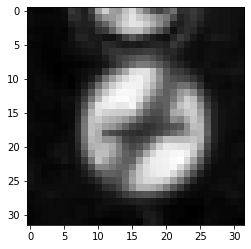

In [33]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))